In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams["figure.figsize"] = (9,5)

In [2]:
class UnionFind:
    def __init__(self, nodes):
        self.parent = {v: v for v in nodes}
        self.rank = {v: 0 for v in nodes}
    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    def union(self, x, y):
        rx, ry = self.find(x), self.find(y)
        if rx == ry:
            return False
        if self.rank[rx] < self.rank[ry]:
            self.parent[rx] = ry
        else:
            self.parent[ry] = rx
            if self.rank[rx] == self.rank[ry]:
                self.rank[rx] += 1
        return True

def kruskal_mst(nodes, edges):
    uf = UnionFind(nodes)
    sorted_edges = sorted(edges, key=lambda x: x[2])
    mst_edges = []
    total = 0
    for u, v, w in sorted_edges:
        if uf.union(u, v):
            mst_edges.append((u, v, w))
            total += w
    # connectivity not strictly checked here; calling code may check
    return total, mst_edges

def prim_mst(graph, start=None):
    if not graph:
        return 0, []
    if start is None:
        start = next(iter(graph))
    visited = set([start])
    pq = []
    for v,w in graph[start]:
        heapq.heappush(pq, (w, start, v))
    mst_edges = []
    total = 0
    while pq:
        w, u, v = heapq.heappop(pq)
        if v in visited:
            continue
        visited.add(v)
        mst_edges.append((u, v, w))
        total += w
        for nei, nw in graph[v]:
            if nei not in visited:
                heapq.heappush(pq, (nw, v, nei))
    return total, mst_edges

In [3]:
nodes4 = ["A","B","C","D","E"]
edges4 = [
    ("A","B",1),("A","C",3),("B","C",1),
    ("B","D",4),("C","D",1),("C","E",6),("D","E",5)
]

# Build adjacency for Prim
graph4 = {n: [] for n in nodes4}
for u, v, w in edges4:
    graph4[u].append((v,w))
    graph4[v].append((u,w))

tot_p, mst_p = prim_mst(graph4, start="A")
tot_k, mst_k = kruskal_mst(nodes4, edges4)

print("Prim MST total cost:", tot_p)
print("Prim MST edges:", mst_p)
print("Kruskal MST total cost:", tot_k)
print("Kruskal MST edges:", mst_k)

Prim MST total cost: 8
Prim MST edges: [('A', 'B', 1), ('B', 'C', 1), ('C', 'D', 1), ('D', 'E', 5)]
Kruskal MST total cost: 8
Kruskal MST edges: [('A', 'B', 1), ('B', 'C', 1), ('C', 'D', 1), ('D', 'E', 5)]


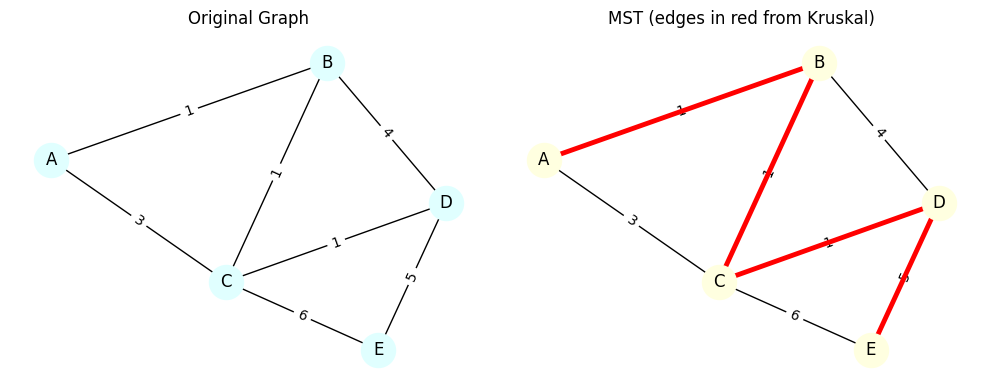

In [4]:
G4 = nx.Graph()
for u,v,w in edges4:
    G4.add_edge(u, v, weight=w)
pos = nx.spring_layout(G4, seed=5)

plt.figure(figsize=(10,4))
# Original
plt.subplot(1,2,1)
nx.draw(G4, pos, with_labels=True, node_color='lightcyan', node_size=600)
nx.draw_networkx_edge_labels(G4, pos, edge_labels=nx.get_edge_attributes(G4,'weight'))
plt.title("Original Graph")

# MST overlay (Kruskal)
plt.subplot(1,2,2)
nx.draw(G4, pos, with_labels=True, node_color='lightyellow', node_size=600)
nx.draw_networkx_edge_labels(G4, pos, edge_labels=nx.get_edge_attributes(G4,'weight'))
nx.draw_networkx_edges(G4, pos, edgelist=[(u,v) for u,v,w in mst_k], width=3.5, edge_color='red')
plt.title("MST (edges in red from Kruskal)")
plt.tight_layout()
plt.show()

In [5]:
print("\nTime Complexity:")
print("- Prim (binary heap): O(E log V)")
print("- Kruskal: O(E log E) ≈ O(E log V)")
print("- Space: O(V + E)")


Time Complexity:
- Prim (binary heap): O(E log V)
- Kruskal: O(E log E) ≈ O(E log V)
- Space: O(V + E)
